# 📊 Unión y Limpieza de datos del Dataset  

---

**Objetivo del Notebook**  
Limpieza de datos, columnas innecesarias y valores nulos/blancos 

**Contexto del análisis**  
- Dataset de muestra proporcionado + csv proporcionado unido en un único excel dataset
- Enfoque en aprendizaje, validación del pipeline y comprensión del proceso

**Valor devuelto**  
- Copia del Dataset de muestra proporcionado completamente limpio y útil 

---




In [4]:
import pandas as pd
import utils
# ===============================
# LEER EL ARCHIVO LIMPIO
# ===============================
dfs = pd.read_excel(r'..\datos\01. Datos originales\DataSET_SF - V2.xlsx', sheet_name=None)

# Ver la primera hoja
oportunidad = list(dfs.values())[0]
cuenta = list(dfs.values())[1]
ecb = list(dfs.values())[2]
solicitud_ban = list(dfs.values())[3]
casos = list(dfs.values())[4]
correos = list(dfs.values())[5]
historial_actividad = list(dfs.values())[6]
historial_etapas = list(dfs.values())[7]
pagos_admision = list(dfs.values())[9]


print(historial_etapas.head())

    LK_Oportunidad__c  PL_Etapa__c PL_Subetapa__c  \
0  0061r00001Eoi9EAAR  Información       Recibida   
1  0061r00001EatFpAAJ  Información       Recibida   
2  0061r00001DdSqlAAF  Información            NaN   
3  0061r00001Ddf1fAAB  Información            NaN   
4  0061r00001FGXaYAAX  Información       Recibida   

                    CreatedDate  CH_Completa_principal__c  \
0  2020-04-29T15:07:11.000+0000                     False   
1  2020-03-04T17:56:10.000+0000                     False   
2  2020-03-31T14:22:24.000+0000                     False   
3  2020-04-03T07:48:09.000+0000                     False   
4  2020-04-07T21:42:33.000+0000                     False   

             Fecha_fin_etapa__c  
0  2022-10-03T13:40:18.000+0000  
1  2021-10-03T20:22:36.000+0000  
2  2021-10-31T09:09:40.000+0000  
3  2021-11-09T16:50:17.000+0000  
4  2021-12-24T21:00:35.000+0000  


In [5]:
from utils import analisis_na_por_columna
analisis_na_por_columna(oportunidad)
analisis_na_por_columna(cuenta)
analisis_na_por_columna(ecb)
analisis_na_por_columna(solicitud_ban)
analisis_na_por_columna(casos)
analisis_na_por_columna(correos)
analisis_na_por_columna(historial_actividad)
analisis_na_por_columna(historial_etapas)
analisis_na_por_columna(pagos_admision)

,columna,total_na,porcentaje_na
0,PL_Origen_pago__c,108753,99.997242
1,LK_Pago__c,91076,83.743426
2,PL_Metodo_pago__c,2,0.001839
3,LK_Oportunidad__c,0,0.000000
4,PL_Tipo__c,0,0.000000
5,CU_Importe__c,0,0.000000
6,CH_Pagado__c,0,0.000000


In [6]:
from utils import analisis_na_por_columna, eliminar_columnas_na, crear_target_auditado


# ===============================
# LIMPIEZA DE NAS
# ===============================

oportunidad = eliminar_columnas_na(oportunidad)
cuenta = eliminar_columnas_na(cuenta)
ecb = eliminar_columnas_na(ecb)
solicitud_ban = eliminar_columnas_na(solicitud_ban)
casos = eliminar_columnas_na(casos)
correos = eliminar_columnas_na(correos)
historial_actvidad = eliminar_columnas_na(historial_actividad)
historial_etapas = eliminar_columnas_na(historial_etapas)
pagos_admision = eliminar_columnas_na(pagos_admision)

# ===============================
# CREACION DEL TARJET
# ===============================

# Ejecución
target = crear_target_auditado(oportunidad, historial_etapas)
target



--- INICIANDO AUDITORÍA DE INTEGRIDAD ---
Total IDs en Maestro Oportunidades: 70297
Total IDs en Historial Etapas: 70211
✅ Coincidencias exactas: 70209
⚠️ IDs en Maestro pero SIN historial: 88 (Posibles registros huérfanos)
⚠️ IDs en Historial pero NO en Maestro: 2 (Oportunidades eliminadas o filtradas)

--- RESUMEN TARGET ---
Matrículas Finales (Target=1): 14033
Tasa de Conversión Total: 19.96%


,ID,ACCOUNTID,PL_CURSO_ACADEMICO,PL_MES_ANIO_INICIO,PL_TIPO_ACCESO,RECORDTYPEID,RECORDTYPENAME,PL_ESTADO,STAGENAME,PL_SUBETAPA,...,CH_CONDITIONED,CH_SOLICITA_ALOJAMIENTO,NOCONTABILIZABLE,PL_MODALIDAD_EXAMEN_ACCESO_ESC,KITDEVISADO,NU_PASOMAX,NU_PASO_SOLICITUD_ADMISION,CH_ACEPTO_CONDICIONES_MATRICUL,PL_DOMICILIO_DURANTE_CURSO,target
0,0066900001W0AKuAAN,0016900002mn3C4AAI,2022/2023,NaN,Acceso a primero,012w0000000K4QPAA0,Solicitud Admisión Grado,Pendiente de validar,Cerrada/Perdida,NaN,...,False,False,False,Online,False,1,3.0,False,NaN,0
1,0066900001cHs6mAAC,0016900002vnlkPAAQ,2022/2023,NaN,Acceso a primero,012w0000000K4QPAA0,Solicitud Admisión Grado,Validado,Cerrada/Perdida,NaN,...,False,False,False,Online,False,1,10.0,False,NaN,0
2,0066900001Ut0u1AAB,0016900002li7RpAAI,2022/2023,NaN,Acceso a primero,012w0000000K4QPAA0,Solicitud Admisión Grado,Pendiente de validar,Cerrada/Perdida,NaN,...,False,False,False,Presencial,False,1,6.0,False,NaN,0
3,0061r00001KLSSJAA5,0011r00002YMDC6AAP,2022/2023,NaN,Acceso a primero,012w0000000K4QPAA0,Solicitud Admisión Grado,Validado,Reorientación,Respuesta candidato,...,False,False,False,Online,False,1,10.0,False,NaN,0
4,0066900001cHemqAAC,0016900002vnWgVAAU,2022/2023,NaN,Acceso a primero,012w0000000K4QPAA0,Solicitud Admisión Grado,Pendiente de validar,Cerrada/Perdida,NaN,...,False,False,False,Online,False,1,2.0,False,NaN,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
70292,006Vl00000ymqHtIAI,001Vl00001DaJLvIAN,2026/2027,SEPTIEMBRE,Acceso a primero,012w0000000K4QUAA0,Solicitud Matricula Máster,Validado,Matrícula Admisión,Inicio,...,False,False,False,Online,False,9,9.0,False,1.0,0
70293,006Vl00000y6S8vIAE,001Vl00001CXYRjIAP,2026/2027,SEPTIEMBRE,Acceso a primero,012w0000000K4QUAA0,Solicitud Matricula Máster,Validado,Matrícula Admisión,Inicio,...,False,False,False,Online,False,9,9.0,False,0.0,0
70294,006Vl00000xvvxFIAQ,001Vl00001CKVl0IAH,2026/2027,SEPTIEMBRE,Acceso a primero,012w0000000K4QUAA0,Solicitud Matricula Máster,Validado,Matrícula Admisión,Matriculado parcialmente,...,False,False,False,Online,False,9,9.0,False,1.0,0
70295,006Vl00000yBErXIAW,001Tr00000WTRyZIAX,2026/2027,NaN,Acceso a primero,012w0000000K4QTAA0,Solicitud Matricula Grado,Validado,Matrícula Admisión,Matriculado parcialmente,...,False,False,False,NaN,False,9,9.0,False,3.0,0


In [24]:
import utils
import pandas as pd
import os

def auditoria_integridad_a_excel(df_oportunidad, df_historial, ruta_salida):
    print("--- INICIANDO ANÁLISIS EXHAUSTIVO Y EXPORTACIÓN ---")
    
    # 1. Identificación de IDs únicos
    ids_op = set(df_oportunidad['ID'].unique())
    ids_hist = set(df_historial['LK_Oportunidad__c'].unique())
    
    # 2. Análisis de discrepancias (Operaciones de conjuntos)
    solo_en_oportunidad = ids_op - ids_hist
    solo_en_historial = ids_hist - ids_op
    
    # --- PREPARACIÓN DE LAS 4 PESTAÑAS ---
    
    # Pestaña 1: Resumen General
    df_resumen = pd.DataFrame({
        'Métrica': [
            'Total IDs en Maestro Oportunidades', 
            'Total IDs en Historial Etapas', 
            'IDs Coincidentes (En ambas)', 
            'IDs en Oportunidad SIN Historial', 
            'IDs en Historial SIN Maestro Oportunidad'
        ],
        'Cantidad': [
            len(ids_op), 
            len(ids_hist), 
            len(ids_op.intersection(ids_hist)), 
            len(solo_en_oportunidad), 
            len(solo_en_historial)
        ]
    })

    # Pestaña 2: Análisis agregado de Etapas Huérfanas
    df_huerfanos_hist_full = df_historial[df_historial['LK_Oportunidad__c'].isin(solo_en_historial)]
    analisis_etapas = df_huerfanos_hist_full.groupby(['PL_Etapa__c', 'PL_Subetapa__c']).size().reset_index(name='Num_Registros')
    analisis_etapas = analisis_etapas.sort_values('Num_Registros', ascending=False)

    # Pestaña 3: Listado de IDs Huérfanos (Historial -> No en Maestro)
    # Solo extraemos los IDs únicos que causan la discrepancia
    df_ids_huerfanos_hist = pd.DataFrame(list(solo_en_historial), columns=['LK_Oportunidad__c_Huerfano'])

    # Pestaña 4: Detalle de Oportunidades sin Historial (Maestro -> No en Historial)
    df_detalle_solo_op = df_oportunidad[df_oportunidad['ID'].isin(solo_en_oportunidad)]
    
    # --- ESCRITURA EN EXCEL CON FORMATO ---
    try:
        with pd.ExcelWriter(ruta_salida, engine='xlsxwriter') as writer:
            # Escribir pestañas
            df_resumen.to_excel(writer, sheet_name='01_Resumen_General', index=False)
            analisis_etapas.to_excel(writer, sheet_name='02_Analisis_Etapas_Huerfanas', index=False)
            df_ids_huerfanos_hist.to_excel(writer, sheet_name='03_IDs_Huerfanos_en_Historial', index=False)
            df_detalle_solo_op.to_excel(writer, sheet_name='04_Oportunidades_Sin_Historial', index=False)
            
            # Ajuste automático de ancho de columnas
            for sheet in writer.sheets:
                writer.sheets[sheet].set_column('A:Z', 20)
        
        print(f"✅ Auditoría completada. Fichero guardado en: {ruta_salida}")
        
    except Exception as e:
        print(f"❌ Error al generar el Excel: {e}")

    # Muestra rápida por consola
    print("\n[PREVIA] 3 registros en Oportunidad sin historial:")
    print(df_detalle_solo_op[['ID']].head(3))

# Ejemplo de ejecución:
#auditoria_integridad_a_excel(target, historial_etapas, 'Auditoria_Integridad_UNAV.xlsx')

# Ejecución
#resultados_auditoria = auditoria_integridad_detallada(target, historial_etapas)
auditoria_integridad_a_excel(target, historial_etapas, "../datos/AnalisisOportunidadesFaltantes.xlsx")

--- INICIANDO ANÁLISIS EXHAUSTIVO Y EXPORTACIÓN ---
✅ Auditoría completada. Fichero guardado en: ../datos/AnalisisOportunidadesFaltantes.xlsx

[PREVIA] 3 registros en Oportunidad sin historial:
                       ID
60519  006Vl000011MREzIAO
60620  006Tr00000Hg4i9IAB
62449  006Tr00000WgQ0UIAV


# Análisis descriptivo (Seguimiento 1)

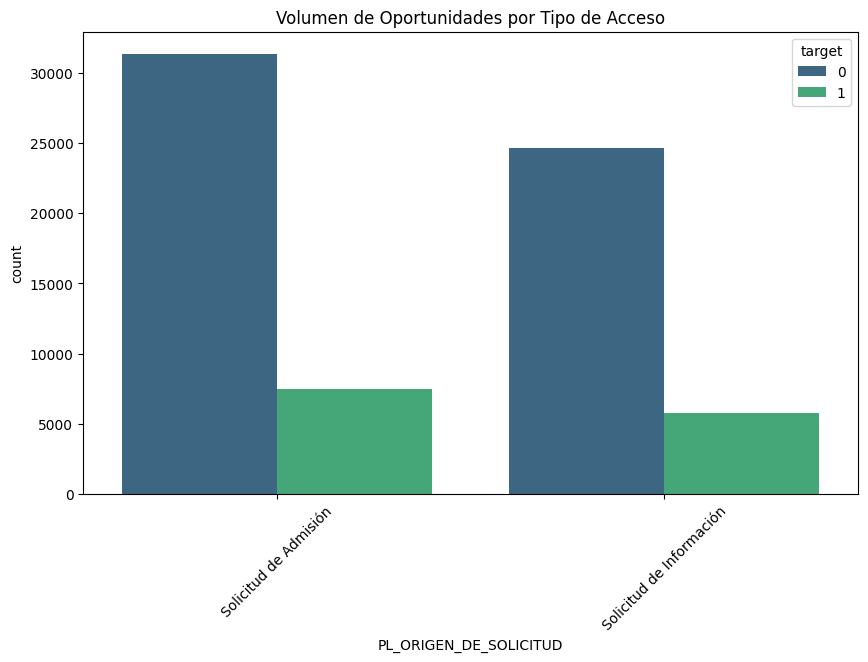

No Matriculado (0)  \
PL_CURSO_ACADEMICO PL_ORIGEN_DE_SOLICITUD                         
2022/2023          Solicitud de Admisión                   6303   
                   Solicitud de Información                5293   
2023/2024          Solicitud de Admisión                   6379   
                   Solicitud de Información                5422   
2024/2025          Solicitud de Admisión                   6362   
                   Solicitud de Información                5009   
2025/2026          Solicitud de Admisión                   6614   
                   Solicitud de Información                4848   
2026/2027          Solicitud de Admisión                   5726   
                   Solicitud de Información                4057   

                                             Matriculado (1)  Total  \
PL_CURSO_ACADEMICO PL_ORIGEN_DE_SOLICITUD                             
2022/2023          Solicitud de Admisión                1811   8114   
                   Solicitud de Información             1448   6741   
2023/2024          Solicitud de Admisión                1790   8169   
                   Solicitud de Información             1356   6778   
2024/2025          Solicitud de Admisión                1824   8186   
                   Solicitud de Información             1410   6419   
2025/2026          Solicitud de Admisión                2062   8676   
                   Solicitud de Información             1573   6421   
2026/2027          Solicitud de Admisión                   0   5726   
                   Solicitud de Información                0   4057   

                                             % Fidelidad  
PL_CURSO_ACADEMICO PL_ORIGEN_DE_SOLICITUD                 
2022/2023          Solicitud de Admisión           22.32  
                   Solicitud de Información        21.48  
2023/2024          Solicitud de Admisión           21.91  
                   Solicitud de Información        20.01  
2024/2025          Solicitud de Admisión           22.28  
                   Solicitud de Información        21.97  
2025/2026          Solicitud de Admisión           23.77  
                   Solicitud de Información        24.50  
2026/2027          Solicitud de Admisión            0.00  
                   Solicitud de Información         0.00

In [25]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Resumen numérico con cálculo de porcentaje
resumen_acceso = target.groupby(['PL_CURSO_ACADEMICO', 'PL_ORIGEN_DE_SOLICITUD', 'target'])['ID'].nunique().unstack(fill_value=0)
resumen_acceso.columns = ['No Matriculado (0)', 'Matriculado (1)']

# Calcular Total y % de Matriculados (Tasa de Conversión/Fidelidad)
resumen_acceso['Total'] = resumen_acceso['No Matriculado (0)'] + resumen_acceso['Matriculado (1)']
resumen_acceso['% Fidelidad'] = (resumen_acceso['Matriculado (1)'] / resumen_acceso['Total'] * 100).round(2)


# Gráfico Global de Acceso: total
plt.figure(figsize=(10, 6))
sns.countplot(data=target.drop_duplicates('ID'), x='PL_ORIGEN_DE_SOLICITUD', hue='target', palette='viridis')
plt.title('Volumen de Oportunidades por Tipo de Acceso')
plt.xticks(rotation=45)
plt.show()
resumen_acceso

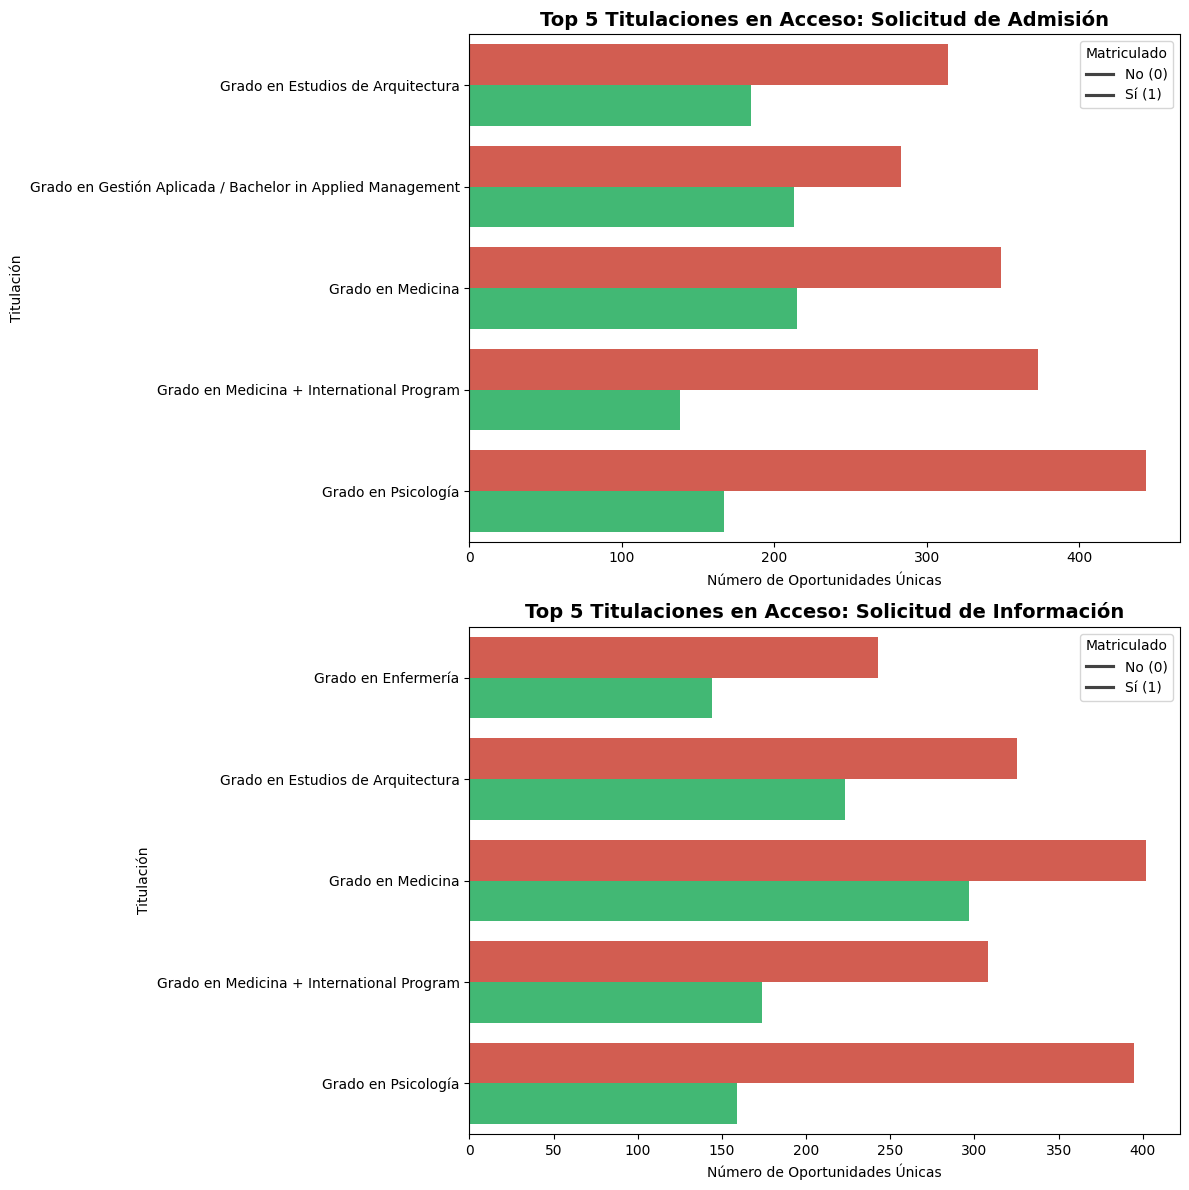

In [27]:
import utils
import matplotlib.pyplot as plt
def graficar_top_por_acceso(df, top_n=5):
    # 1. Agrupar y contar oportunidades únicas
    df_counts = df.groupby(['PL_ORIGEN_DE_SOLICITUD', 'TITULACION_DEF', 'target'])['ID'].nunique().reset_index()
    df_counts.columns = ['Acceso', 'Titulación', 'Target', 'Oportunidades']

    # 2. Obtener los tipos de acceso únicos
    accesos = df_counts['Acceso'].unique()
    
    # 3. Crear una figura con subplots (uno por cada tipo de acceso)
    fig, axes = plt.subplots(len(accesos), 1, figsize=(12, 6 * len(accesos)))
    if len(accesos) == 1: axes = [axes] # Manejo de caso con un solo acceso

    for i, acceso in enumerate(accesos):
        # Filtrar datos por acceso y coger las N titulaciones con más volumen total
        data_acceso = df_counts[df_counts['Acceso'] == acceso]
        top_titulaciones = data_acceso.groupby('Titulación')['Oportunidades'].sum().nlargest(top_n).index
        data_top = data_acceso[data_acceso['Titulación'].isin(top_titulaciones)]

        # Pintar en el subplot correspondiente
        sns.barplot(
            ax=axes[i],
            data=data_top,
            y='Titulación',
            x='Oportunidades',
            hue='Target',
            palette={0: '#e74c3c', 1: '#2ecc71'} # Rojo para No, Verde para Sí
        )
        axes[i].set_title(f'Top {top_n} Titulaciones en Acceso: {acceso}', fontsize=14, fontweight='bold')
        axes[i].set_xlabel('Número de Oportunidades Únicas')
        axes[i].legend(title='Matriculado', labels=['No (0)', 'Sí (1)'])

    plt.tight_layout()
    plt.show()
graficar_top_por_acceso(target, top_n=5)

In [28]:
columnas_seleccionadas = [
    # Identificadores y Target
    'ACCOUNTID', 'ID','ID18__PC', 'target', 'PL_CURSO_ACADEMICO',
    
    # Rendimiento Académico
    'NU_NOTA_MEDIA_ADMISION', 'NU_NOTA_MEDIA_1_BACH__PC', 'CH_PRUEBAS_CALIFICADAS', 
    'NU_RESULTADO_ADMISION_PUNTOS', 'PL_RESOLUCION_DEFINITIVA', 'TITULACION', 'NU_PASO_SOLICITUD_ADMISION'
    
    # Compromiso Económico
    'MINIMUMPAYMENTPAYED', 'PAID_AMOUNT', 'PAID_PERCENT', 'CH_PAGO_SUPERIOR', 
    'CH_AYUDA_FINANCIACION', 'CU_IMPORTE_TOTAL',
    'PL_ORIGEN_PAGO__C', 'PL_METODO_PAGO__C', 'CH_PAGO_INTEGRO__C', 'NU_PORCENTAJE_DESCUENTO_PRONTO_PAGO__C',
    'NU_IMPORTE_DESCUENTO_PRONTO_PAGO__C', 'CU_IMPORTE__C', 'PL_TIPO__C', 'CH_PAGADO__C', 'IMPORTE_MINIMO_PERSONALIZADO',
    'TX_BECA_SOLICITADA', 'CH_MATRICULA_SUJETA_BECA',
    
    # Engagement y Actividad
    'CH_VISITACAMPUS__PC', 'CH_ENTREVISTA_PERSONAL__PC', 'ACC_DTT_FECHAULTIMAACTIVIDAD', 
    'NU_PREFERENCIA', 'STAGENAME', 'PL_SUBETAPA','PL_PLAZO_ADMISION', 'CH_ORIGEN_ADMISION'
    
    # Perfil Sociodemográfico y Fidelidad
    'CH_HIJO_EMPLEADO__PC', 'CH_HIJO_ANTIGUO_ALUMNO__PC', 'CH_HERMANOS_ESTUDIANDO_UNAV__P', 
    'YEARPERSONBIRTHDATE', 'NAMEX', 'CH_FAMILIA_NUMEROSA__PC', 'PL_SITUACION_SOCIO_ECONOMICA',
    'TX_COMPOSICION_FAMILIAR__C', 'NU_MIEMBROS_FAMILIA__PC',
    
    # Origen y Canal
    'LEADSOURCE', 'PL_ORIGEN_DE_SOLICITUD', 'LK_CENTROENSENANZA', 
]


# Unir la tabla con cuenta y obtener filtrar los datos que nos interesen
df_unido = pd.merge(
    target, 
    cuenta, 
    left_on='ACCOUNTID', 
    right_on='ID18', 
    how='left',
    suffixes=('', '_cuenta')
)		
columnas_finales =  [col for col in columnas_seleccionadas if col in df_unido.columns]
df_unido_filtrado =  df_unido[columnas_finales].copy()

#================================
# COMPROBACIONES DEL CRUCE
#================================
total_target = target['ACCOUNTID'].nunique()
match_cuenta = df_unido['ID18'].notna().sum()

print(f"Total oportunidades (ACCOUNTID únicos): {total_target}")
print(f"Con cuenta asociada: {match_cuenta}")
print(f"Match rate: {round(match_cuenta / total_target * 100, 2)}%")

ids_sin_cuenta = df_unido.loc[df_unido['ID18'].isna(), 'ACCOUNTID'].nunique()

print(f"⚠️ ACCOUNTID sin match en cuenta: {ids_sin_cuenta}")

dups_cuenta = cuenta['ID18'].duplicated().sum()
print(f"Duplicados en cuenta.ID18: {dups_cuenta}")

print("Filas target:", len(target))
print("Filas df_unido:", len(df_unido))

validacion = df_unido.groupby('ACCOUNTID')['ID18'].nunique()

problemas = validacion[validacion > 1]
print(f"ACCOUNTID con más de una cuenta asociada: {len(problemas)}")

print("ACCOUNTID nulos:", target['ACCOUNTID'].isna().sum())
print("ID18 nulos:", cuenta['ID18'].isna().sum())

print("""
AUDITORÍA DE CRUCE TARGET–CUENTA
--------------------------------
✔ Clave de cruce: ACCOUNTID ↔ ID18
✔ Tipo de join: LEFT
✔ Duplicados en cuenta: {dups}
✔ Match rate: {rate}%
✔ Filas infladas: {inflado}
""".format(
    dups=dups_cuenta,
    rate=round(match_cuenta / total_target * 100, 2),
    inflado=len(df_unido) - len(target)
))

# IDs de cuenta duplicados
ids_duplicados = (
    cuenta['ID18']
    .value_counts()
    .loc[lambda x: x > 1]
    .index
)

# Registros completos en cuenta
casos_duplicados_cuenta = cuenta[cuenta['ID18'].isin(ids_duplicados)]

print(f"Casos duplicados en cuenta: {len(casos_duplicados_cuenta)}")

#Filtrar primero el historial por oportunidades válidas:

ids_validos = set(df_unido['ID'].unique())

historial_filtrado = historial_etapas[
    historial_etapas['LK_Oportunidad__c'].isin(ids_validos)
]


historial_filtrado = historial_filtrado.merge(
    df_unido[['ID', 'target']],
    left_on='LK_Oportunidad__c',
    right_on='ID',
    how='left'
)


print("Targets nulos tras cruce con cuenta:", df_unido['target'].isna().sum())
print("Targets nulos tras filtrar historial:", historial_filtrado['target'].isna().sum())

#casos_duplicados_cuenta.head()
# Detectar IDs duplicados
duplicados_mask = cuenta['ID18'].duplicated(keep=False)  # keep=False marca todos los duplicados

# Filtrar las filas duplicadas
duplicados = cuenta[duplicados_mask]

# Mostrar algunos ejemplos (top 10)
print("Ejemplos de duplicados en cuenta.ID18:")
print(duplicados.sort_values('ID18').head(10))

# Agrupar por ID18 y contar ocurrencias
duplicados_resumen = cuenta.groupby('ID18').size().reset_index(name='conteo')

# Filtrar solo los que se repiten más de una vez
duplicados_resumen = duplicados_resumen[duplicados_resumen['conteo'] > 1]

# Ordenar por la cantidad de duplicados descendente
duplicados_resumen = duplicados_resumen.sort_values(by='conteo', ascending=False)

# Mostrar top 10 duplicados
print("Top 10 IDs duplicados en cuenta.ID18:")
print(duplicados_resumen.head(10))



Total oportunidades (ACCOUNTID únicos): 55276
Con cuenta asociada: 70296
Match rate: 127.17%
⚠️ ACCOUNTID sin match en cuenta: 1
Duplicados en cuenta.ID18: 0
Filas target: 70297
Filas df_unido: 70297
ACCOUNTID con más de una cuenta asociada: 0
ACCOUNTID nulos: 0
ID18 nulos: 0

AUDITORÍA DE CRUCE TARGET–CUENTA
--------------------------------
✔ Clave de cruce: ACCOUNTID ↔ ID18
✔ Tipo de join: LEFT
✔ Duplicados en cuenta: 0
✔ Match rate: 127.17%
✔ Filas infladas: 0

Casos duplicados en cuenta: 0
Targets nulos tras cruce con cuenta: 0
Targets nulos tras filtrar historial: 0
Ejemplos de duplicados en cuenta.ID18:
Empty DataFrame
Columns: [ID18, ID18__PC, YEARPERSONBIRTHDATE, PL_SEXO__PC, LK_NACIONALIDAD__PC, NAMEX, FOR_PAIS_DE_NACIMIENTO__PC, FOR_PROVINCIA_DE_NACIMIENTO__P, TX_LOCALIDAD_NACIMIENTO__PC, PERSONMOBILEPHONE, CH_AYUDA_FINANCIACION, CH_FAMILIA_NUMEROSA__PC, PL_TIPO_FAMILIA_NUMEROSA__PC, CH_HERMANOS_ESTUDIANDO_UNAV__P, PL_MINUSVALIA__PC, ACCOUNTSOURCE, PERSONLEADSOURCE, RATING, P

In [29]:
from utils import calcular_tiempos_etapas, limpiar_historial_por_hitos, analizar_cruce_target
import numpy as np
import pandas as pd

historial_etapas_tiempo = calcular_tiempos_etapas(historial_etapas)

df_final = limpiar_historial_por_hitos(historial_etapas_tiempo, df_unido_filtrado)

ejemplo_id = '0061r00000yz6vuAAA'

columnas_comprobacion = [
    'LK_Oportunidad__c', 'CreatedDate', 'PL_Etapa__c', 'PL_Subetapa__c',
    'fecha_pruebas_calificadas', 'NU_NOTA_MEDIA_ADMISION',
    'fecha_matricula_iniciada', 'PAID_AMOUNT', 'CH_PRUEBAS_CALIFICADAS', 
        'NU_RESULTADO_ADMISION_PUNTOS', 'PL_RESOLUCION_DEFINITIVA', 'target'
]

print("--- COMPROBACIÓN DE LÓGICA TEMPORAL ---")
df_final[df_final['LK_Oportunidad__c'] == ejemplo_id][columnas_comprobacion].sort_values('CreatedDate')

# 1. Obtenemos los IDs únicos de la tabla de oportunidad
# Es importante usar .unique() para que la búsqueda sea más rápida y limpia
ids_oportunidad_unicos = oportunidad['ID'].unique()
 
# 2. Filtramos df_final basándonos en esa lista
df_final_filtrado = df_final[df_final['ID'].isin(ids_oportunidad_unicos)].copy()
 
# 3. Verificación rápida por consola
print(f"Registros originales en df_final: {len(df_final)}")
print(f"Registros tras filtrar por oportunidad: {len(df_final_filtrado)}")
print(f"IDs descartados: {len(df_final) - len(df_final_filtrado)}")

resumen, df_cruce_optimo = analizar_cruce_target(
    df_final=df_final_filtrado,
    historial_etapas=historial_etapas,
    col_fecha="CreatedDate",
    col_target="target"
)
 
#target final : df_final_filtrado
print(resumen)


--- COMPROBACIÓN DE LÓGICA TEMPORAL ---
Registros originales en df_final: 536575
Registros tras filtrar por oportunidad: 536569
IDs descartados: 6
      estrategia  n_total  n_target_ok  na_target  pct_na  pct_cobertura
0   merge_exacto  6398701      6398701          0     0.0            1.0
1  merge + ffill  6398701      6398701          0     0.0            1.0


In [32]:
# Ejecutar análisis
from utils import analizar_integridad_cruce
analizar_integridad_cruce(target, ecb, df_final_filtrado)

--- ANÁLISIS DE INTERSECCIÓN ---
1. Oportunidades en df_final_v3: 70297
2. Oportunidades con datos en ECB: 6280
✅ Coincidencias (Oportunidades con info económica): 6280
⚠️ Oportunidades SIN info económica (Solo Maestro): 64017
⚠️ IDs en ECB que no existen en el Maestro: 0

--- COMPROBACIÓN DE TARGETS ---
✅ No se han detectado TARGETS a NA. El dataset es consistente.


In [34]:
# Realizamos el Left Join
# df_final_v3 (Izquierda) mantiene todos sus registros
# ecb (Derecha) aporta datos donde coincida el ID
df_integrado = df_final_filtrado.merge(
    ecb[['LK_oportunidad__c',"FO_rentaMEC_for__c",	"FO_rentaFam_ges__c",	"CU_precioOrdinario_def__c",	"CU_precioIncentivado_def__c",	"CU_precioFamNum_def__c",	"PO_descFamNum_def__c",	"CU_precioAplicado_def__c"]], 
    left_on='ID', 
    right_on='LK_oportunidad__c', 
    how='left'
)
 
print(f"Dataset integrado generado. Filas totales: {len(df_integrado)}")



Dataset integrado generado. Filas totales: 536598


In [35]:
import importlib
import utils
importlib.reload(utils)
from utils import calcular_tiempos_etapas, limpiar_historial_por_hitos, analizar_cruce_target


In [36]:
import pandas as pd
import numpy as np
from utils import integrar_actividades_progresivo_por_curso
# Ejecución
df_final_v3 = integrar_actividades_progresivo_por_curso(df_final_filtrado, historial_actividad)
# ==========================================
# EJECUCIÓN
# ==========================================
# Print de comprobación para ver la evolución de un contacto
ejemplo_acc = df_final_v3[df_final_v3['num_asistencias_acum'] > 0]['ID18__PC'].iloc[1]
cols_print = ['ID','ID18__PC','ACCOUNTID', 'CreatedDate', 'PL_Etapa__c', 'num_asistencias_acum', 'num_solicitudes_acum']

print("\n--- COMPROBACIÓN DE EVOLUCIÓN DE ACTIVIDADES ---")
df_final_v3[df_final_v3['ID18__PC'] == ejemplo_acc][cols_print].sort_values('CreatedDate')
#historial_actividad.loc[historial_actividad['ContactId']=='003690000312P6pAAE',]

Procesando 536569 filas con lógica de curso y progresión temporal...
Cruzando datos por ID18__PC y Curso Académico...
Aplicando filtro temporal progresivo...
Agrupando resultados...
Consolidando en el DataFrame maestro...
✅ Proceso completado.

--- COMPROBACIÓN DE EVOLUCIÓN DE ACTIVIDADES ---


,ID,ID18__PC,ACCOUNTID,CreatedDate,PL_Etapa__c,num_asistencias_acum,num_solicitudes_acum
2136,0066900001NaGn4AAF,003690000312P6pAAE,0016900002dZM7DAAW,2021-02-25 18:10:48+00:00,Información,0,0
2137,0066900001NaGn4AAF,003690000312P6pAAE,0016900002dZM7DAAW,2021-10-03 10:20:32+00:00,Inicio,0,0
2138,0066900001NaGn4AAF,003690000312P6pAAE,0016900002dZM7DAAW,2021-10-21 19:51:42+00:00,Cerrada/Perdida,0,0
2139,0066900001NaGn4AAF,003690000312P6pAAE,0016900002dZM7DAAW,2021-10-21 19:52:20+00:00,Inicio,0,0
2140,0066900001NaGn4AAF,003690000312P6pAAE,0016900002dZM7DAAW,2021-10-24 18:24:59+00:00,Validación,1,1
2141,0066900001NaGn4AAF,003690000312P6pAAE,0016900002dZM7DAAW,2021-10-25 09:15:00+00:00,Validación,1,1
2142,0066900001NaGn4AAF,003690000312P6pAAE,0016900002dZM7DAAW,2021-12-16 08:37:56+00:00,Pruebas de admisión,1,1
2143,0066900001NaGn4AAF,003690000312P6pAAE,0016900002dZM7DAAW,2021-12-16 09:05:00+00:00,Pruebas de admisión,1,1
2144,0066900001NaGn4AAF,003690000312P6pAAE,0016900002dZM7DAAW,2021-12-16 09:45:00+00:00,Estudio Centro,1,1
2145,0066900001NaGn4AAF,003690000312P6pAAE,0016900002dZM7DAAW,2022-01-07 10:04:53+00:00,Estudio Centro,1,1


In [37]:
# ===============================
# 3. GUARDAR EXCEL LIMPIO
# ===============================
df_integrado.to_csv(r"..\datos\02. Datos tratamiento preliminar\01_datos_tratamiento_preliminar - V2.csv",sep=";")

print("Archivo limpio guardado como '01_datos_tratamiento_preliminar - V2.csv'")

Archivo limpio guardado como '01_datos_tratamiento_preliminar - V2.csv'


# 📊 Creación del Dataset Maestro

---

**Objetivo del Notebook**  
Creacion del dataset maestro una vez obtenido el dataset limpio

**Contexto del análisis**  
- Dataset limpio en etapas anteriores

**Valor devuelto**  
- Copia del Dataset de muestra proporcionado completamente funcional

---




TAREA 1: Comprobar que el conjunto de datos contiene todas las variables importantes de la pestaña de cuenta: Variables relacionadas con el origen del alumno: nacional o internacional, colegio de procedencia, si el colegio es afín o no a la UNAV, si es hijo de empleado o de profesor asociado (por los descuentos en matrícula), si es familia numerosa y de qué tipo.

In [ ]:
# ===============================
# VARIABLES CLAVE ESPERADAS (CUENTA)
# ===============================

variables_cuenta_clave = {
    "Origen del alumno": [
        "PL_NACIONALIDAD__C",          # cambiar por colegio
        "PL_TIPO_ALUMNO__C"            # Nacional / Internacional (alternativa frecuente)
    ],
    
    "Colegio de procedencia": [
        "LK_CENTROENSENANZA",
        "CH_CENTRO_AFIN_UNAV__C"       # Colegio afín a UNAV, añadir nota media 1º bachillerato, hijo empleado, hijo medico, hijo hermanos en la unav, etc
    ],
    
    "Vínculo con UNAV (descuentos)": [
        "CH_HIJO_EMPLEADO__PC",
        "CH_HIJO_PROFESOR_ASOCIADO__C" # si existe
    ],
    
    "Familia numerosa": [
        "CH_FAMILIA_NUMEROSA__PC",
        "PL_TIPO_FAMILIA_NUMEROSA__C"  # general / especial, añadir nº miembros de la familia, 
    ]
}



In [ ]:
# ===============================
# COMPROBACIÓN DE EXISTENCIA EN CUENTA: verificamos qué está y qué falta realmente en el dataframe cuenta.
# ===============================

columnas_cuenta = set(cuenta.columns)

estado_variables = []

for bloque, vars_bloque in variables_cuenta_clave.items():
    for var in vars_bloque:
        estado_variables.append({
            "Bloque": bloque,
            "Variable": var,
            "Existe_en_cuenta": var in columnas_cuenta
        })

df_estado_variables = pd.DataFrame(estado_variables)
df_estado_variables


,Bloque,Variable,Existe_en_cuenta
0,Origen del alumno,PL_NACIONALIDAD__C,False
1,Origen del alumno,PL_TIPO_ALUMNO__C,False
2,Colegio de procedencia,LK_CENTROENSENANZA,False
3,Colegio de procedencia,CH_CENTRO_AFIN_UNAV__C,False
4,Vínculo con UNAV (descuentos),CH_HIJO_EMPLEADO__PC,True
5,Vínculo con UNAV (descuentos),CH_HIJO_PROFESOR_ASOCIADO__C,False
6,Familia numerosa,CH_FAMILIA_NUMEROSA__PC,True
7,Familia numerosa,PL_TIPO_FAMILIA_NUMEROSA__C,False


In [ ]:
# ===============================
# COMPROBAR PRESENCIA EN DATASET FINAL: comprobamos si esas variables han sobrevivido al cruce y están en el dataset final.
# ===============================

columnas_final = set(df_integrado.columns)

df_estado_variables["Existe_en_df_integrado"] = (
    df_estado_variables["Variable"].isin(columnas_final)
)

df_estado_variables


,Bloque,Variable,Existe_en_cuenta,Existe_en_df_integrado
0,Origen del alumno,PL_NACIONALIDAD__C,False,False
1,Origen del alumno,PL_TIPO_ALUMNO__C,False,False
2,Colegio de procedencia,LK_CENTROENSENANZA,False,True
3,Colegio de procedencia,CH_CENTRO_AFIN_UNAV__C,False,False
4,Vínculo con UNAV (descuentos),CH_HIJO_EMPLEADO__PC,True,False
5,Vínculo con UNAV (descuentos),CH_HIJO_PROFESOR_ASOCIADO__C,False,False
6,Familia numerosa,CH_FAMILIA_NUMEROSA__PC,True,True
7,Familia numerosa,PL_TIPO_FAMILIA_NUMEROSA__C,False,False


In [ ]:
# ===============================
# CALIDAD DE VARIABLES EXISTENTES: Para las que sí existen en df_integrado, comprobamos si tienen datos útiles.
# ===============================

vars_validas = df_estado_variables.loc[
    df_estado_variables["Existe_en_df_integrado"],
    "Variable"
].tolist()

calidad = (
    df_integrado[vars_validas]
    .isna()
    .mean()
    .reset_index()
    .rename(columns={"index": "Variable", 0: "% NA"})
)

calidad["% NA"] = (calidad["% NA"] * 100).round(2)
calidad.sort_values("% NA", ascending=False)


,Variable,% NA
0,LK_CENTROENSENANZA,9.38
1,CH_FAMILIA_NUMEROSA__PC,0.00


In [ ]:
# ===============================
# CONCLUSIÓN AUTOMÁTICA
# ===============================

conclusion = df_estado_variables.copy()
conclusion["Estado"] = np.select(
    [
        ~conclusion["Existe_en_cuenta"],
        conclusion["Existe_en_cuenta"] & ~conclusion["Existe_en_df_integrado"],
        conclusion["Existe_en_df_integrado"]
    ],
    [
        "❌ No existe en origen",
        "⚠️ Existe en cuenta pero no llegó al dataset final",
        "✅ Disponible en dataset final"
    ]
)

conclusion

#REVISAR LA NACIONALIDAD POR SI SE LLAMA DISTINTO (EN EL EXCEL)


,Bloque,Variable,Existe_en_cuenta,Existe_en_df_integrado,Estado
0,Origen del alumno,PL_NACIONALIDAD__C,False,False,❌ No existe en origen
1,Origen del alumno,PL_TIPO_ALUMNO__C,False,False,❌ No existe en origen
2,Colegio de procedencia,LK_CENTROENSENANZA,False,True,❌ No existe en origen
3,Colegio de procedencia,CH_CENTRO_AFIN_UNAV__C,False,False,❌ No existe en origen
4,Vínculo con UNAV (descuentos),CH_HIJO_EMPLEADO__PC,True,False,⚠️ Existe en cuenta pero no llegó al dataset f...
5,Vínculo con UNAV (descuentos),CH_HIJO_PROFESOR_ASOCIADO__C,False,False,❌ No existe en origen
6,Familia numerosa,CH_FAMILIA_NUMEROSA__PC,True,True,✅ Disponible en dataset final
7,Familia numerosa,PL_TIPO_FAMILIA_NUMEROSA__C,False,False,❌ No existe en origen


TAREA 2: Comprobar que el target se ha creado correctamente, que no hay valores vacíos. En caso de tener valores vacíos, comprobar de donde vienen y porqué ocurren. Comprobar que las variables importantes de oportunidad aparecen en el conjunto de datos: tipo de solicitud (Información o admisión), plazo de admisión(con un tratamiento de si es Diciembre, Marzo o Rolling [que es cuando solicitas la prueba y la haces a los días, suele aparecer en blanco] y tratar de construir bien esta variable), nu_preferencia (con el orden de preferencia), si ha pagado, el pago mínimo, notas de admisión, etc. Asegurar que no aparece información de futuro en etapas anteriores. 


In [52]:
# ===============================
# VALIDACIÓN BÁSICA DEL TARGET
# ===============================

print("Valores únicos del target:")
print(df_integrado['target'].value_counts(dropna=False))

print("\nNúmero de target nulos:")
print(df_integrado['target'].isna().sum())

# ===============================
# ANÁLISIS DE TARGET NULOS
# ===============================

target_nulos = df_integrado[df_integrado['target'].isna()]

print(f"Registros con target nulo: {len(target_nulos)}")

target_nulos[['ID', 'STAGENAME', 'PL_SUBETAPA']].head()

# ===============================
# COMPROBAR ORIGEN DEL PROBLEMA
# ===============================

ids_target_nulo = set(target_nulos['ID'])
ids_historial = set(historial_etapas['LK_Oportunidad__c'])

print("IDs con target nulo SIN historial:",
      len(ids_target_nulo - ids_historial))


Valores únicos del target:
target
0.0    327854
1.0    208744
Name: count, dtype: int64

Número de target nulos:
0
Registros con target nulo: 0
IDs con target nulo SIN historial: 0


In [ ]:
# ===============================
# VARIABLES CLAVE DE OPORTUNIDAD
# ===============================

variables_op_clave = {
    "Tipo de solicitud": [
        "PL_ORIGEN_DE_SOLICITUD",  # Información / Admisión
        "CH_ORIGEN_ADMISION"
    ],
    
    "Plazo de admisión": [
        "PL_PLAZO_ADMISION"
    ],
    
    "Preferencia": [
        "NU_PREFERENCIA"
    ],
    
    "Pago": [
        "CH_PAGADO__C",
        "MINIMUMPAYMENTPAYED",
        "IMPORTE_MINIMO_PERSONALIZADO"
    ],
    
    "Notas admisión": [
        "NU_NOTA_MEDIA_ADMISION",
        "NU_RESULTADO_ADMISION_PUNTOS"
    ]
}

# ===============================
# EXISTENCIA DE VARIABLES
# ===============================

estado_op = []

for bloque, vars_bloque in variables_op_clave.items():
    for var in vars_bloque:
        estado_op.append({
            "Bloque": bloque,
            "Variable": var,
            "Existe_en_df_integrado": var in df_integrado.columns
        })

df_estado_op = pd.DataFrame(estado_op)
df_estado_op


In [49]:
df_integrado['PL_PLAZO_ADMISION'].value_counts(dropna=False)

# ===============================
# CONSTRUCCIÓN PLAZO LIMPIO
# ===============================

def normalizar_plazo(x):
    if pd.isna(x):
        return "Rolling"
    x = x.strip().lower()
    if "dic" in x:
        return "Diciembre"
    if "mar" in x:
        return "Marzo"
    return "Otros"

df_integrado['PLAZO_ADMISION_LIMPIO'] = (
    df_integrado['PL_PLAZO_ADMISION']
    .apply(normalizar_plazo)
)

df_integrado['PLAZO_ADMISION_LIMPIO'].value_counts()


PLAZO_ADMISION_LIMPIO
Otros        256829
Diciembre    184478
Marzo         78561
Rolling       16730
Name: count, dtype: int64

In [67]:
# ===============================
# COMPROBACIÓN VARIABLES ECONÓMICAS Y DE PAGO
# ===============================

# Variables económicas que queremos analizar
vars_pago_esperadas = [
    'CH_PAGADO__C',
    'MINIMUMPAYMENTPAYED',
    'IMPORTE_MINIMO_PERSONALIZADO',
    'PAID_AMOUNT',
    'PAID_PERCENT'
]

# Filtrar solo las columnas que existen en df_integrado
vars_pago_existentes = [v for v in vars_pago_esperadas if v in df_integrado.columns]

# Mostrar cuáles existen y cuáles no
print("Variables encontradas en df_integrado:", vars_pago_existentes)
vars_faltantes = [v for v in vars_pago_esperadas if v not in df_integrado.columns]
if vars_faltantes:
    print("⚠️ Variables no encontradas en df_integrado (no se incluyen en análisis):", vars_faltantes)

# Descripción estadística solo de las variables existentes
if vars_pago_existentes:
    print("\n--- Descripción de las variables de pago existentes ---")
    display(df_integrado[vars_pago_existentes].describe())
else:
    print("❌ Ninguna de las variables de pago esperadas está disponible en df_integrado.")

# ===============================
# DETECCIÓN DE INFORMACIÓN FUTURA
# ===============================

# Ejemplo: comprobar pagos antes de la etapa Matrícula
if 'PAID_AMOUNT' in df_integrado.columns:
    casos_incoherentes = df_integrado[
        (df_integrado['PL_Etapa__c'] != 'Matrícula') &
        (df_integrado['PAID_AMOUNT'] > 0)
    ]
    print(f"\n⚠️ Casos con pagos antes de Matrícula: {len(casos_incoherentes)}")
    display(casos_incoherentes[['ID','PL_Etapa__c','PAID_AMOUNT','target']])


Variables encontradas en df_integrado: ['MINIMUMPAYMENTPAYED', 'PAID_AMOUNT', 'PAID_PERCENT']
⚠️ Variables no encontradas en df_integrado (no se incluyen en análisis): ['CH_PAGADO__C', 'IMPORTE_MINIMO_PERSONALIZADO']

--- Descripción de las variables de pago existentes ---


,MINIMUMPAYMENTPAYED,PAID_AMOUNT,PAID_PERCENT
count,0.0,0.0,0.0
mean,NaN,NaN,NaN
std,NaN,NaN,NaN
min,NaN,NaN,NaN
25%,NaN,NaN,NaN
50%,NaN,NaN,NaN
75%,NaN,NaN,NaN
max,NaN,NaN,NaN



⚠️ Casos con pagos antes de Matrícula: 0


,ID,PL_Etapa__c,PAID_AMOUNT,target


In [68]:


df_integrado['NU_PREFERENCIA'].describe()
#df_integrado[['CH_PAGADO__C', 'MINIMUMPAYMENTPAYED', 'IMPORTE_MINIMO_PERSONALIZADO']].describe()


# ===============================
# DETECCIÓN DE INFORMACIÓN FUTURA
# ===============================

casos_incoherentes = df_integrado[
    (df_integrado['PL_Etapa__c'] != 'Matrícula') &
    (df_integrado['PAID_AMOUNT'] > 0)
]

print("Casos con pago antes de etapa de matrícula:",
      len(casos_incoherentes))



Casos con pago antes de etapa de matrícula: 0


TAREA 3: De la pestaña ECB nos interesan tres variables por oportunidad: La renta familiar, el coste ordinario (el coste sin aplicar ningún tipo de descuento) y el Importe matrícula a pagar (que es el valor final que es el importe que paga el alumno con todos los descuentos aplicados), el % del total que acaba pagando el alumno (importe matrícula/coste ordinario * 100). Importante que no aparezca esta variable informada antes de que se realice el estudio de la beca, se puede comprobar con la fecha de la etapa en la que se encuentra la oportunidad y la fecha de solicitud de la beca, en el caso que no haya un cruce más sencillo)

In [72]:
df_integrado = df_final_filtrado.merge(
    ecb[
        [
            'LK_oportunidad__c',
            'FO_rentaMEC_for__c',
            'FO_rentaFam_ges__c',
            'CU_precioOrdinario_def__c',
            'CU_precioIncentivado_def__c',
            'CU_precioFamNum_def__c',
            'PO_descFamNum_def__c',
            'CU_precioAplicado_def__c'
        ]
    ],
    left_on='ID',
    right_on='LK_oportunidad__c',
    how='left'
)

# ===============================
# VARIABLES ECONÓMICAS ECB FINALES
# ===============================

vars_ecb = [
    'FO_rentaFam_ges__c',
    'CU_precioOrdinario_def__c',
    'CU_precioAplicado_def__c'
]

print("Variables ECB disponibles:")
print([v for v in vars_ecb if v in df_integrado.columns])

df_integrado[vars_ecb].describe()


Variables ECB disponibles:
['FO_rentaFam_ges__c', 'CU_precioOrdinario_def__c', 'CU_precioAplicado_def__c']


,FO_rentaFam_ges__c,CU_precioOrdinario_def__c,CU_precioAplicado_def__c
count,5.962800e+04,5.157000e+04,4.365400e+04
mean,9.188794e+04,7.696008e+05,6.517655e+05
std,4.731495e+05,4.911901e+06,5.544944e+06
min,0.000000e+00,3.918600e+03,2.187600e+03
25%,2.679768e+04,1.440000e+04,1.116522e+04
50%,5.937878e+04,1.622544e+04,1.419540e+04
75%,9.569859e+04,1.860000e+04,1.750050e+04
max,3.375774e+07,3.529012e+07,1.139021e+08


In [73]:
# ===============================
# % PAGADO SOBRE COSTE ORDINARIO
# ===============================

df_integrado['PORCENTAJE_PAGADO_FINAL'] = (
    df_integrado['CU_precioAplicado_def__c'] /
    df_integrado['CU_precioOrdinario_def__c']
) * 100

# Control de valores infinitos o incoherentes
df_integrado.loc[
    df_integrado['CU_precioOrdinario_def__c'] <= 0,
    'PORCENTAJE_PAGADO_FINAL'
] = np.nan

df_integrado['PORCENTAJE_PAGADO_FINAL'].describe()


count     41236.000000
mean        111.096947
std        1646.022424
min           0.035000
25%          74.999045
50%          91.998994
75%         100.000000
max      100857.687421
Name: PORCENTAJE_PAGADO_FINAL, dtype: float64

In [74]:
df_integrado['PL_Etapa__c'].value_counts()

# ===============================
# DETECCIÓN DE INFORMACIÓN FUTURA (ECB)
# ===============================

etapas_previas_beca = [
    'Solicitud',
    'Pruebas',
    'Admisión académica'
]

casos_info_futura = df_integrado[
    (df_integrado['PL_Etapa__c'].isin(etapas_previas_beca)) &
    (df_integrado['CU_precioAplicado_def__c'].notna())
]

print("Casos con importe final antes del estudio de beca:",
      len(casos_info_futura))

casos_info_futura[
    ['ID', 'PL_Etapa__c', 'CU_precioAplicado_def__c', 'FO_rentaFam_ges__c']
].head()


Casos con importe final antes del estudio de beca: 0


,ID,PL_Etapa__c,CU_precioAplicado_def__c,FO_rentaFam_ges__c


In [75]:
df_integrado.loc[
    df_integrado['PL_Etapa__c'].isin(etapas_previas_beca),
    ['CU_precioAplicado_def__c', 'PORCENTAJE_PAGADO_FINAL']
] = np.nan


TAREA 4: De la pestaña de etapas, obtener el tiempo que lleva en cada etapa. En caso de ser la etapa actual, que se calcule como el tiempo entre el inicio de la etapa y la fecha de hoy en días.

In [80]:
# ===============================
# TIEMPO EN CADA ETAPA (SOLUCIÓN FINAL ABSOLUTA)
# ===============================

import pandas as pd
import numpy as np

df_etapas = historial_etapas.copy()

# Asegurar datetime (pandas)
df_etapas['CreatedDate'] = pd.to_datetime(
    df_etapas['CreatedDate'],
    errors='coerce'
)

# Orden correcto
df_etapas = df_etapas.sort_values(
    by=['LK_Oportunidad__c', 'CreatedDate']
)

# Fecha siguiente etapa
df_etapas['fecha_siguiente_etapa'] = (
    df_etapas
    .groupby('LK_Oportunidad__c')['CreatedDate']
    .shift(-1)
)

df_etapas['fecha_siguiente_etapa'] = pd.to_datetime(
    df_etapas['fecha_siguiente_etapa'],
    errors='coerce'
)

# Fecha de hoy
fecha_hoy = np.datetime64(pd.Timestamp.today().normalize())

# Fecha fin: si no hay siguiente etapa → hoy
fecha_fin = np.where(
    df_etapas['fecha_siguiente_etapa'].isna(),
    fecha_hoy,
    df_etapas['fecha_siguiente_etapa'].to_numpy(dtype='datetime64[ns]')
)

# Fecha inicio como numpy datetime
fecha_inicio = df_etapas['CreatedDate'].to_numpy(dtype='datetime64[ns]')

# 🔥 CÁLCULO DEFINITIVO EN DÍAS
df_etapas['dias_en_etapa'] = (
    (fecha_fin - fecha_inicio) / np.timedelta64(1, 'D')
).astype(int)

# Limpieza defensiva
df_etapas.loc[df_etapas['dias_en_etapa'] < 0, 'dias_en_etapa'] = 0

# Resultado
df_etapas[
    [
        'LK_Oportunidad__c',
        'PL_Etapa__c',
        'CreatedDate',
        'fecha_siguiente_etapa',
        'dias_en_etapa'
    ]
].head()


,LK_Oportunidad__c,PL_Etapa__c,CreatedDate,fecha_siguiente_etapa,dias_en_etapa
60684,0061r00000yz6vuAAA,Propuesta centro,2022-08-02 13:02:10+00:00,2022-08-02 13:02:10+00:00,0
60685,0061r00000yz6vuAAA,Resolución,2022-08-02 13:02:10+00:00,2022-08-02 13:02:36+00:00,0
60686,0061r00000yz6vuAAA,Propuesta centro,2022-08-02 13:02:36+00:00,2022-08-03 06:58:58+00:00,0
60765,0061r00000yz6vuAAA,Resolución,2022-08-03 06:58:58+00:00,2022-08-03 06:59:30+00:00,0
60766,0061r00000yz6vuAAA,Propuesta centro,2022-08-03 06:59:30+00:00,2022-08-03 07:18:19+00:00,0


TAREA 5: De la pestaña de historial de actividades obtener el número de actividades que lleva asistidas hasta esa etapa, comprobar que se calcula bien. Si da tiempo, añadir las actividades de la pestaña casos que son "Asistencia familias" para que se cuente como actividad. Importante comprobar que no se cuentan actividades futuras.

In [81]:
# ===============================
# LIMPIEZA ACTIVIDADES
# ===============================

df_act = df_actividades.copy()

# Fecha actividad
df_act['fecha_actividad'] = pd.to_datetime(
    df_act['ActivityDate'],
    errors='coerce'
)

# Nos quedamos solo con actividades asistidas / completadas
df_act = df_act[
    df_act['Status'].isin(['Asistida', 'Completada', 'Completed'])
]

df_act = df_act[
    ['LK_Oportunidad__c', 'fecha_actividad']
].dropna()


NameError: name 'df_actividades' is not defined